In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('Movies.csv', encoding='latin1')

df.head()

revenue  vote_average  vote_count           title original_language  \
0    4300000           6.6         714      Four Rooms                en   
1         12           6.4          96  Judgment Night                en   
2  775398007           8.1        8550       Star Wars                en   
3  940335536           7.7        8085    Finding Nemo                en   
4  677945399           8.3       10346    Forrest Gump                en   

  release_date                               production_companies  \
0   1995-12-09                         Miramax Films,A Band Apart   
1   1993-10-15  Universal Pictures,Largo Entertainment,JVC Ent...   
2   1977-05-25                         Lucasfilm,20th Century Fox   
3   2003-05-30                                              Pixar   
4   1994-07-06                                          Paramount   

             production_countries                            genres  \
0        United States of America                      Crime,Comedy   
1  Japan,United States of America             Action,Thriller,Crime   
2        United States of America  Adventure,Action,Science Fiction   
3        United States of America                  Animation,Family   
4        United States of America              Comedy,Drama,Romance   

                                            director  \
0  Allison Anders,Alexandre Rockwell,Robert Rodri...   
1                                    Stephen Hopkins   
2                                       George Lucas   
3                         Andrew Stanton,Lee Unkrich   
4                                    Robert Zemeckis   

                                        producer  \
0  Lawrence Bender,Paul Hellerman,Scott Lambert,   
1       Gene Levy,Christopher Mollo,Lloyd Segan,   
2          Gary Kurtz,George Lucas,Rick McCallum   
3       Jinko Gotoh,John Lasseter,Graham Walters   
4  Wendy Finerman,Charles Newirth,Steve Starkey,   

                                             cast  runtimes  \
0   Sammi Davis,Amanda De Cadenet,Valeria Golino,      98.0   
1    Emilio Estevez,Cuba Gooding Jr.,Denis Leary,     110.0   
2        Mark Hamill,Harrison Ford,Carrie Fisher,     121.0   
3  Albert Brooks,Ellen DeGeneres,Alexander Gould,     100.0   
4         Tom Hanks,Rebecca Williams,Sally Field,     142.0   

                                              writer  
0  Allison Anders,Alexandre Rockwell,Robert Rodri...  
1          Lewis Colick,Jere Cunningham,Lewis Colick  
2                                       George Lucas  
3        Andrew Stanton,Andrew Stanton,Bob Peterson,  
4                            Winston Groom,Eric Roth

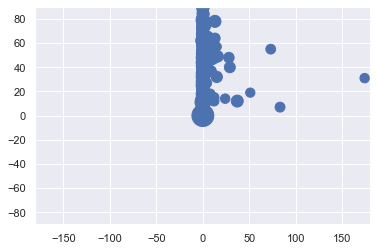

In [12]:
plt.scatter(df['revenue'],df['vote_count'],df['runtimes'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [16]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df.dropna(inplace=True)
print(df)

        revenue  vote_average  vote_count                   title  \
0       4300000           6.6         714              Four Rooms   
1            12           6.4          96          Judgment Night   
2     775398007           8.1        8550               Star Wars   
3     940335536           7.7        8085            Finding Nemo   
4     677945399           8.3       10346            Forrest Gump   
...         ...           ...         ...                     ...   
9995          0           7.0           4  All the Kind Strangers   
9996          0           6.3          20          Nothing Sacred   
9997          0           0.0           0   The Old Swimmin' Hole   
9998          0           5.0           2   Once Upon a Honeymoon   
9999          0           6.2           8         Anthony Adverse   

     original_language release_date  \
0                   en   1995-12-09   
1                   en   1993-10-15   
2                   en   1977-05-25   
3              

In [18]:
 x = df.loc[:, ['revenue','vote_count', 'runtimes']] # 1t for rows and second for columns
x

revenue  vote_count  runtimes
0       4300000         714      98.0
1            12          96     110.0
2     775398007        8550     121.0
3     940335536        8085     100.0
4     677945399       10346     142.0
...         ...         ...       ...
9995          0           4      90.0
9996          0          20      77.0
9997          0           0      81.0
9998          0           2      81.0
9999          0           8     141.0

[8211 rows x 3 columns]

In [20]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [21]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, ..., 0, 0, 0])

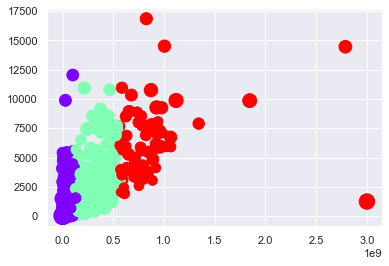

In [22]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['revenue'],data_with_clusters['vote_count'], data_with_clusters['runtimes'],c=data_with_clusters['Clusters'],cmap='rainbow')